In [152]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# homework 2
write a function that takes a probability distribution sample (an unsorted numpy array of numbers that were sampled from a probability distribution) and calculate the high probability density intervals (5%-100% percentile of the probability density). Report all continuous regions as separate intervals. Please test it with the bimodal distribution below and see whether you get two HPD regions instead of just one.
The output should be in the form of a list of intervals (list of two values that brace the interval). For example: [[-4.0,0.0],[2.0,6.0]].
The first step is to estimate the probability density which you can get by binning the data into a histogram (here the challenge is to pick an appropriate binning density).  Then you have to sort the data according to probability density and then picking the HPD data.  After that you need to estimate the continuous intervals of data.

Good luck

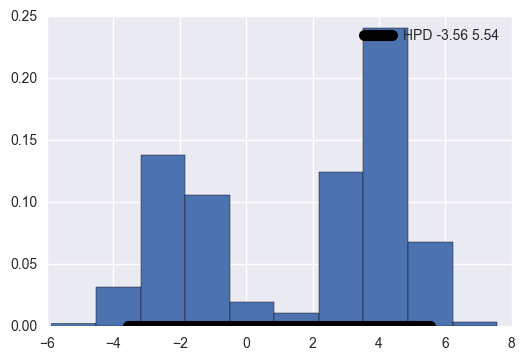

In [153]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)

# mix norm is the input of your function
mix_norm = np.concatenate((gauss_a, gauss_b))

HPD = np.percentile(mix_norm,[2.5,97.5])
plt.hist(mix_norm, normed=True)
plt.plot(HPD,[0,0],label='HPD {:.2f} {:.2f}'.format(*HPD),
        linewidth=8, color='k')
plt.legend(fontsize=10)

In [154]:
len(mix_norm)

5000

In [155]:
mix_norm.sort()

In [156]:
mix_norm

array([-5.86400414, -5.81132979, -5.48172421, ...,  6.97541926,
        7.04672994,  7.55655027])

In [157]:
hist, edges = np.histogram(mix_norm, bins=40)

In [158]:
cum = np.cumsum(hist)
cum = np.insert(cum,0,0)
print(hist)
print(cum)

[  2   1   3   9   8  38  75  89 169 196 282 280 255 192 177  88  66  45
  16   4   3   9  21  41 101 178 223 333 419 442 401 352 223 133  73  28
  17   5   2   1]
[   0    2    3    6   15   23   61  136  225  394  590  872 1152 1407 1599
 1776 1864 1930 1975 1991 1995 1998 2007 2028 2069 2170 2348 2571 2904 3323
 3765 4166 4518 4741 4874 4947 4975 4992 4997 4999 5000]


In [159]:
element_list = [mix_norm[c:c+h] for h,c in zip(hist,cum)]

[array([-5.86400414, -5.81132979]),
 array([-5.48172421]),
 array([-5.1316493 , -5.11295565, -4.94040349]),
 array([-4.83955034, -4.66349656, -4.62509927, -4.6024857 , -4.58610965,
        -4.56144863, -4.55782269, -4.5313482 , -4.52459062]),
 array([-4.47011147, -4.42344369, -4.39440585, -4.36855277, -4.34192956,
        -4.31147033, -4.306963  , -4.1893346 ]),
 array([-4.17501053, -4.17398314, -4.14696891, -4.14398435, -4.10905367,
        -4.09248986, -4.09161938, -4.08582879, -4.08452193, -4.05049424,
        -4.04596046, -4.03815533, -4.0110438 , -3.98635313, -3.98389852,
        -3.97870936, -3.970654  , -3.95538346, -3.95045484, -3.95034166,
        -3.94483635, -3.944096  , -3.94179155, -3.9367659 , -3.92736043,
        -3.92129063, -3.91691928, -3.91300193, -3.9091414 , -3.90153572,
        -3.89097227, -3.8890348 , -3.88169213, -3.87591252, -3.86356932,
        -3.86194597, -3.86194461, -3.8558058 ]),
 array([-3.84985043, -3.84860513, -3.81607151, -3.81255961, -3.80618788,
  

In [160]:
hist_sort = np.argsort(hist)
hist_cum = np.cumsum(sorted(hist))
print(hist_sort)
print(hist_cum)

[39  1 38  0 20  2 19 37  4 21  3 18 36 22 35  5 23 17 16 34  6 15  7 24 33
  8 14 25 13  9 26 32 12 11 10 27 31 30 28 29]
[   1    2    4    6    9   12   16   21   29   38   47   63   80  101  129
  167  208  253  319  392  467  555  644  745  878 1047 1224 1402 1594 1790
 2013 2236 2491 2771 3053 3386 3738 4139 4558 5000]


In [161]:
getrid = int(len(mix_norm)*0.05)
print(getrid)

250


In [162]:
element_hpd = element_list[:]
for rid, cu in zip(hist_sort,hist_cum):
    if cu>getrid:
        end_index = rid
        break
    element_hpd[rid]=np.array([])
still_has_to_go = len(np.concatenate(element_hpd))-int(len(mix_norm)*0.95)
still_has_to_go

42

In [163]:
hpd_intervals=[]
interval_start = None
for index, bin in enumerate(element_hpd):
    if index == end_index:
        if interval_start is None:
            interval_start = bin[end_index]
            continue
        else:
            hpd_intervals.append([interval_start,bin[-end_index-1]])
            interval_start = None
            continue
    if interval_start is None:
        if bin.size>0:
            interval_start = bin[0]
    else:
        if bin.size==0:
            hpd_intervals.append([interval_start,element_hpd[index-1][-1]])
            interval_start = None


In [164]:
hpd_intervals

[[-3.8498504316562112, -0.00013123007846593815],
 [2.1887405747869044, 5.8764343094221934]]

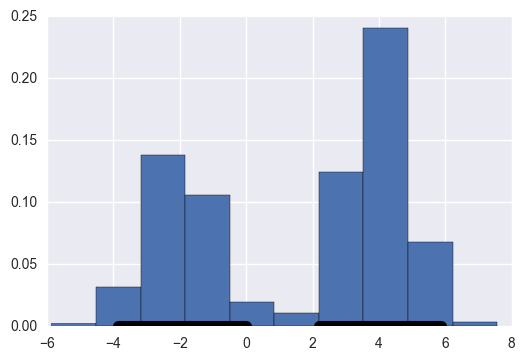

In [165]:
plt.hist(mix_norm, normed=True)
for hpd in hpd_intervals:
    plt.plot(hpd,[0,0],
        linewidth=8, color='k')